In [111]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

## MAKE MOON EXERCISE

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV

In [65]:
X, y = make_moons(n_samples=10000, noise=0.4)

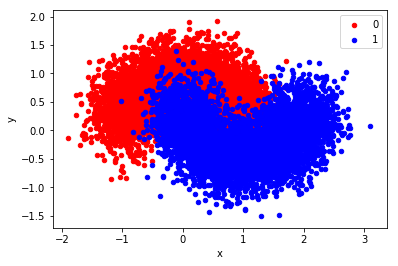

In [40]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7000, 2)
(7000,)
(3000, 2)
(3000,)


In [68]:
param_grid = [
    {'max_depth':[2,3,4,5],'max_leaf_nodes':[2,4,6,8,16,32,64]}
]
tree_clf = DecisionTreeClassifier()

In [69]:
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_leaf_nodes': [2, 4, 6, 8, 16, 32, 64], 'max_depth': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
grid_search.best_params_

{'max_depth': 5, 'max_leaf_nodes': 32}

In [71]:
final_tree_clf = grid_search.best_estimator_

In [72]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, final_tree_clf.predict(X_test)))

0.8623333333333333


## SHUFFLE SPLITTING IT

In [73]:
from sklearn.model_selection import ShuffleSplit

In [99]:
n_trees = 1000
n_instances = 100

In [100]:
mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)


In [103]:
for train_index, test_index in rs.split(X_train):
    X_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [112]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7971163333333334

In [113]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

    
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [114]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.86